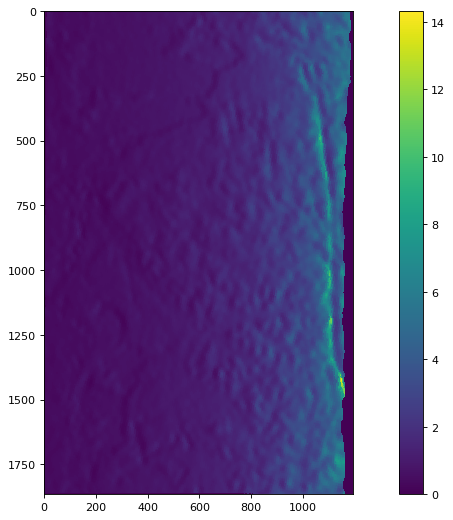

In [54]:
import numpy as np
import matplotlib.pyplot as plt
### From stackoverflow, to make imshow subplot with individuals colorbars
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
####

band1 = np.loadtxt("band1.txt")
band2 = np.loadtxt("band2.txt")





/usr/local/insa/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


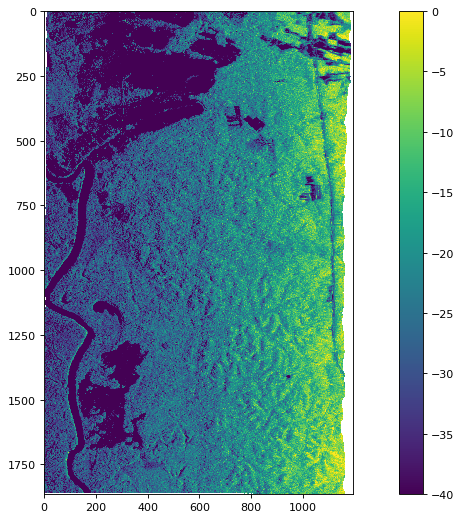

In [58]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(10*np.log(band2),vmin=-40,vmax=0)
plt.colorbar()
plt.show()


/usr/local/insa/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


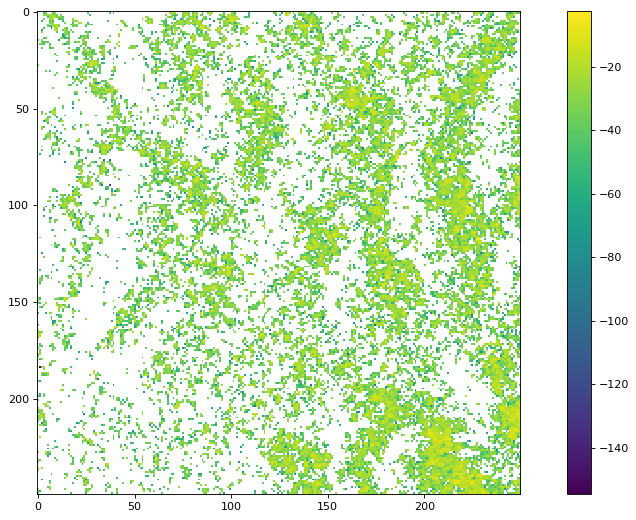

In [72]:
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
original = band2[1000:1250,600:850]
original2 = band1[1000:1250,600:850]
plt.imshow(10*np.log(original))
#plt.imshow(original2)

template = original[50:200,50:200]
template2 = original2[50:200,50:200]
#plt.imshow(template2)
plt.colorbar()
plt.show()

In [36]:
from scipy import signal
from scipy import misc

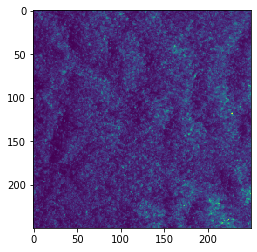

In [73]:
original -= original.mean()
template -= template.mean()
template2 -= template2.mean()

plt.imshow(original)
plt.show()
#original = original + np.random.randn(*face.shape) * 50  # add noise

In [74]:
corr = signal.correlate2d(original, template2, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match


/usr/local/insa/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


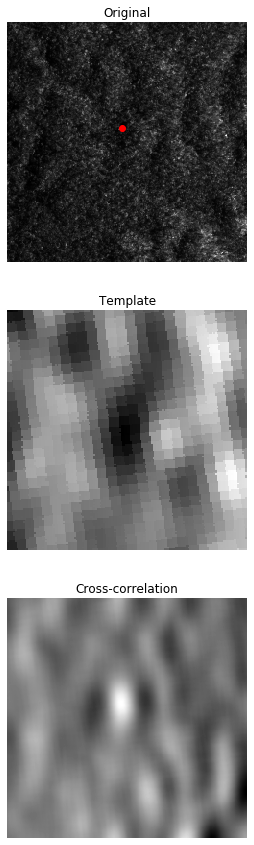

In [75]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,figsize=(6, 15))
ax_orig.imshow(original, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template2, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')
fig.show()

119 110


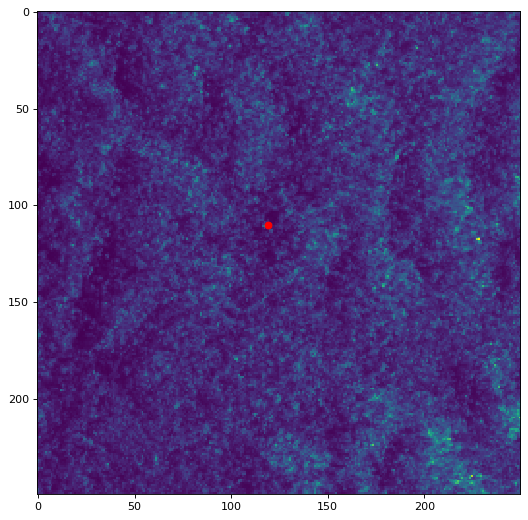

In [77]:
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
print(x,y)
plt.imshow(original)
plt.plot(x, y, 'ro')